# Clustering

- filter raccoons and get 0-15
- apply K-means, use interaction time in the distance matrix
- evaluate with silhouette index.

In [3]:
import glob
import numpy as np
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Silhouette:
# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.

In [4]:
def preprocess(g):
    # Filtering: remove edges > 15
    remove = [node for node in g.nodes if int(node) > 15]
    g.remove_nodes_from(remove)

    # the distance is the inverse of the interaction
    # take log because the interaction values have a big range
    A = nx.to_numpy_matrix(g)
    X = 1/(1+np.log(A + 1))
    np.fill_diagonal(X, 0)
    return X


def plot_spring(g, labels):
    plt.figure()
    ax1 = plt.subplot(111)
    
    gn_pos = nx.spring_layout(g)
    g1 = nx.draw_networkx_nodes(g, gn_pos, node_color=labels, node_size=500, label=labels)
    nx.draw_networkx_edges(g, gn_pos, alpha=0.2)
    
    plt.axis('off')
    legend1 = ax1.legend(*g1.legend_elements(), title="Classes")
    ax1.add_artist(legend1)
    plt.show()

    
def cluster_score(X, g):
    scores = []
    labels = []
    for i in range(2, len(X)):
        kmeans_model = KMeans(n_clusters=i, precompute_distances=True).fit(X)
        l = kmeans_model.labels_
        s = silhouette_score(X, l, metric="precomputed")
        scores.append(s)
        labels.append(l)
    
    idx = np.argmax(scores)
    clust_lab = labels[idx]
    plot_spring(g, clust_lab)
    return clust_lab, scores[idx], scores, labels

In [9]:
dir_name = '../raccoon_proximity_weighted/weighted_raccoon_matrix_*.graphml'
all_files = glob.glob(dir_name)

In [11]:
files = [(int(f.split('_')[5].split('.')[0]), f) for f in all_files]

In [13]:
files.sort()

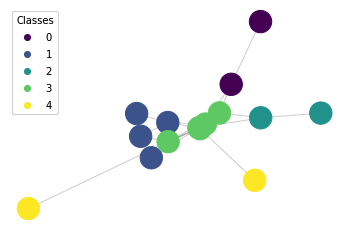

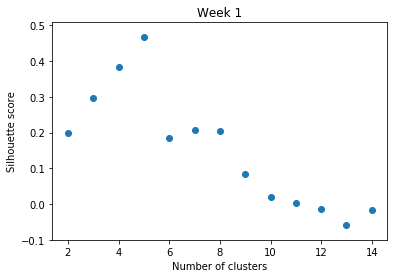

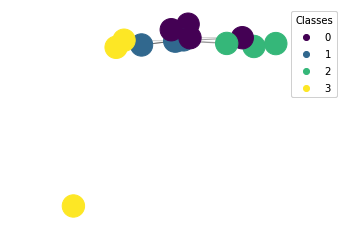

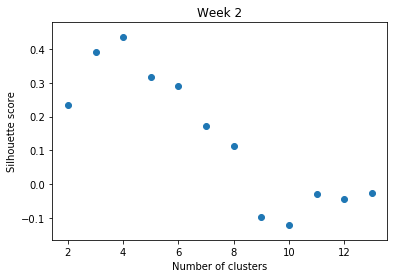

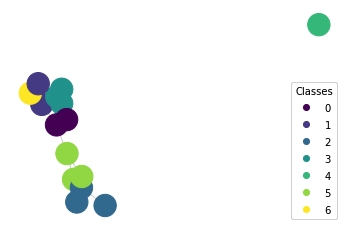

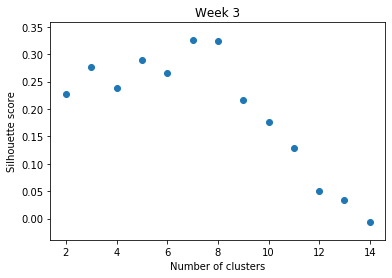

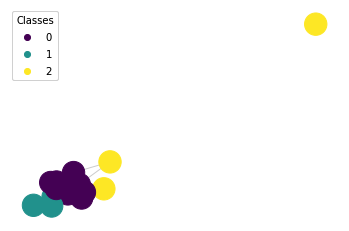

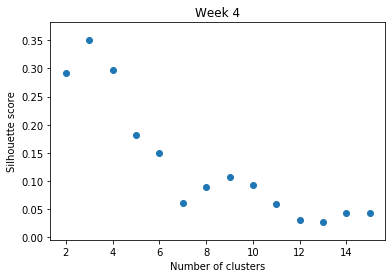

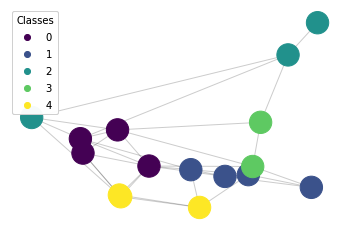

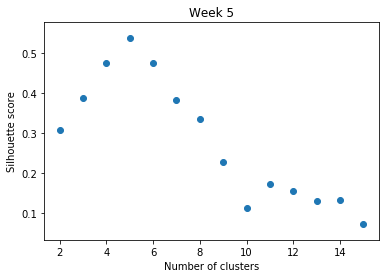

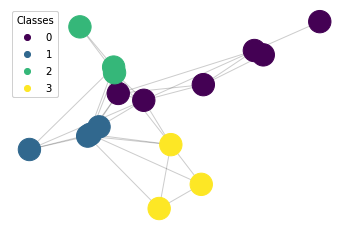

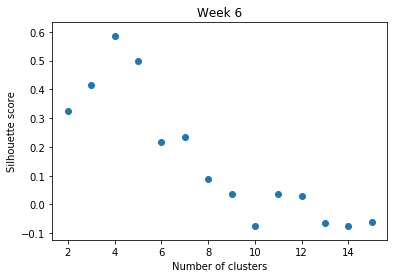

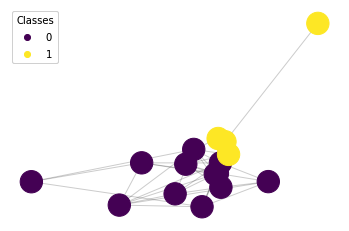

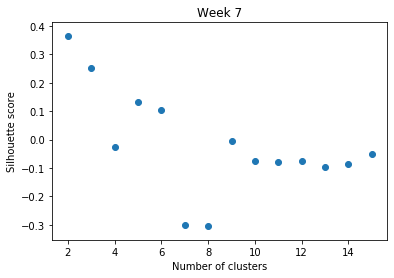

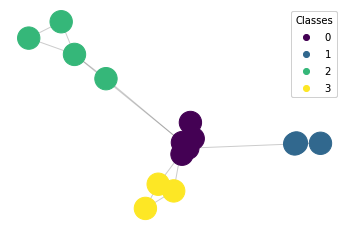

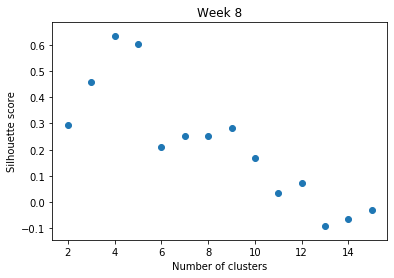

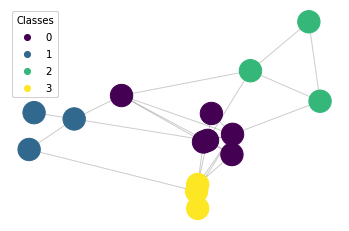

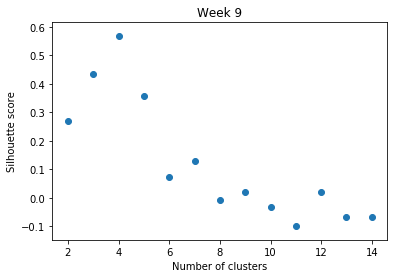

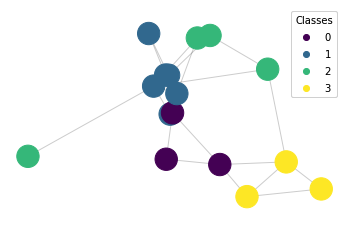

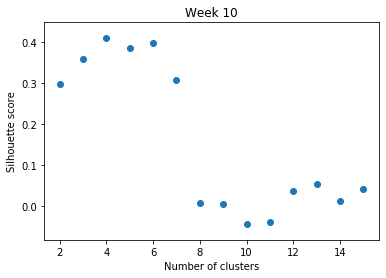

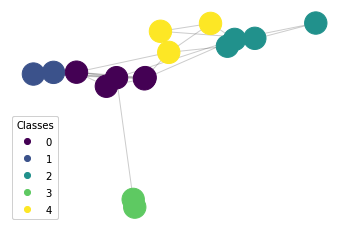

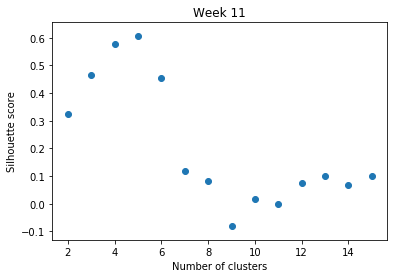

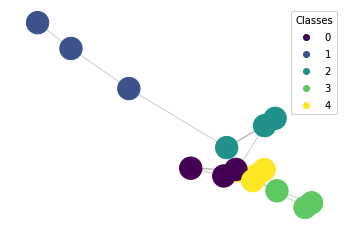

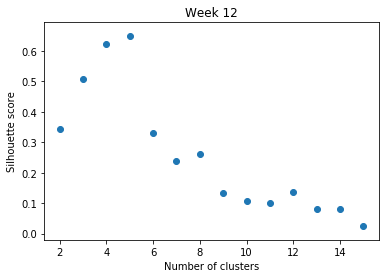

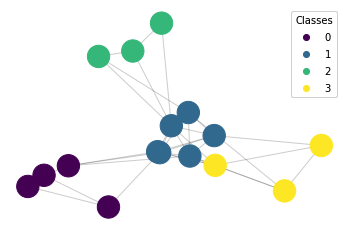

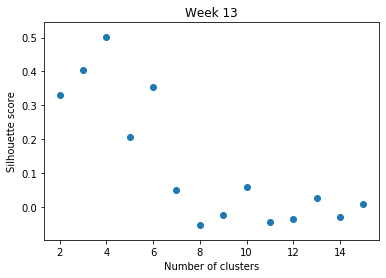

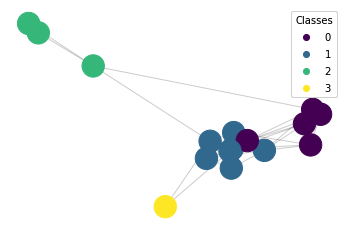

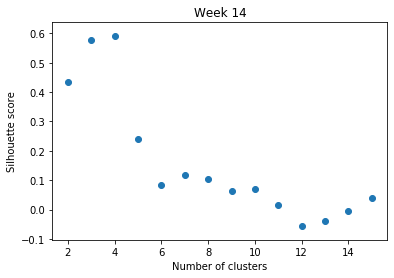

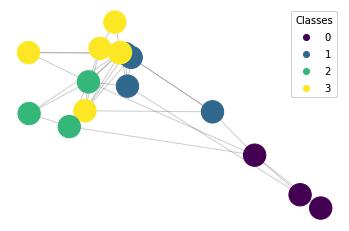

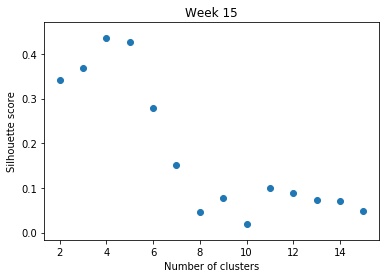

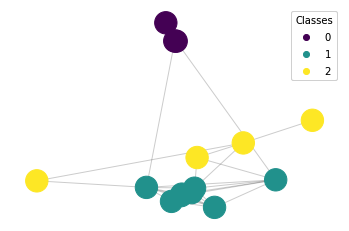

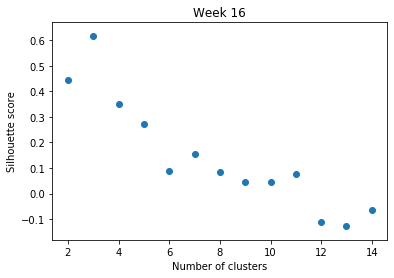

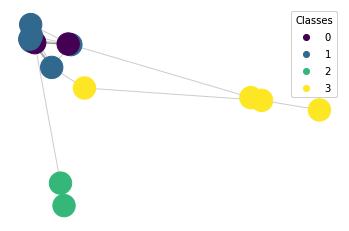

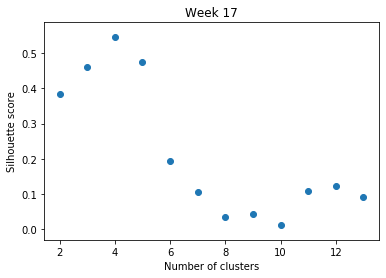

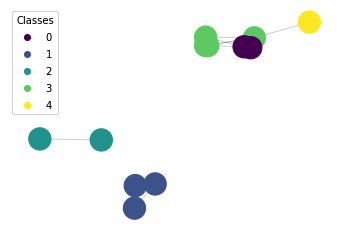

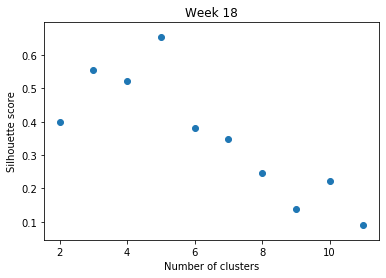

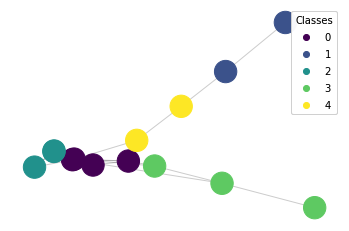

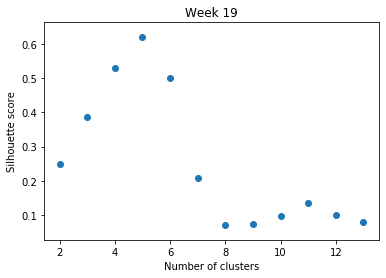

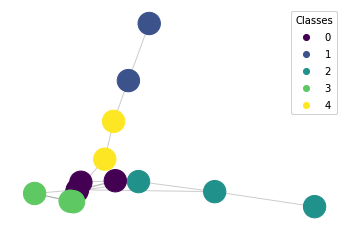

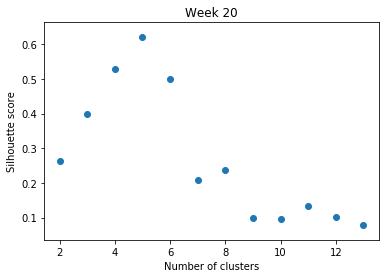

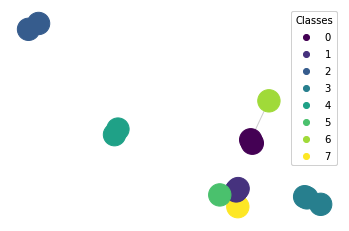

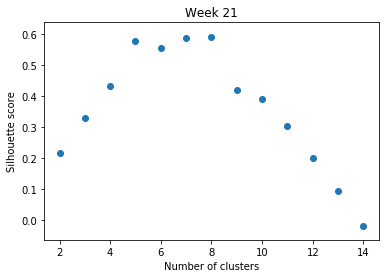

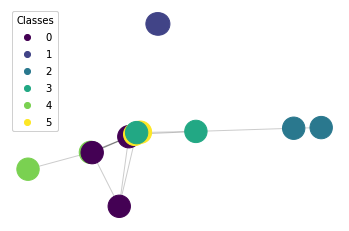

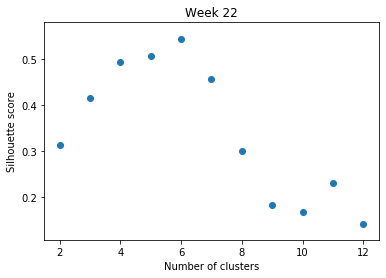

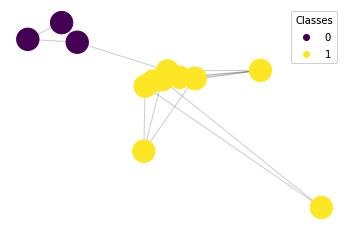

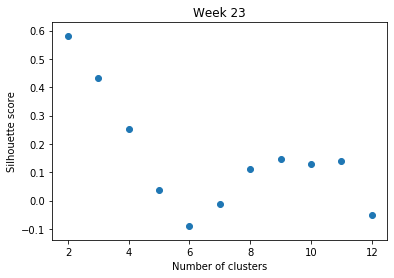

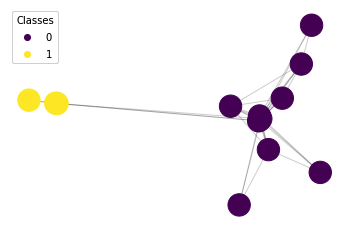

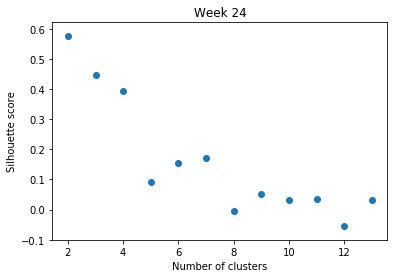

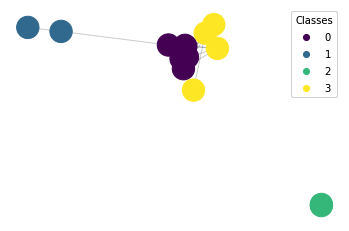

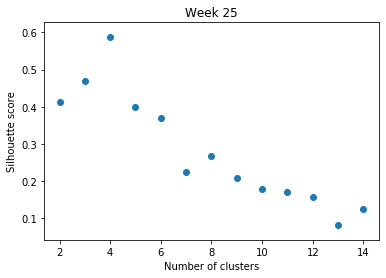

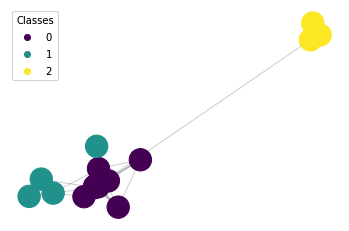

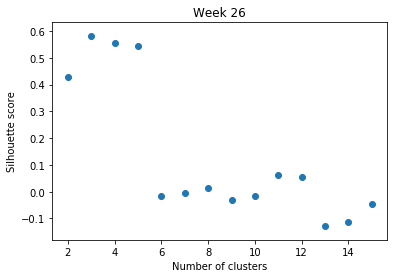

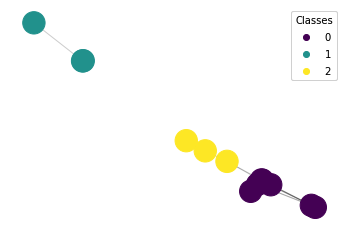

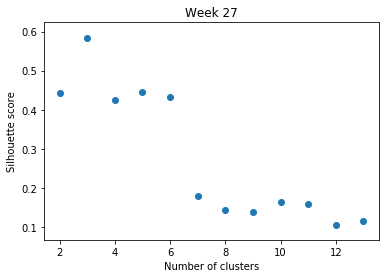

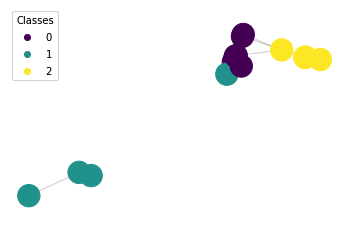

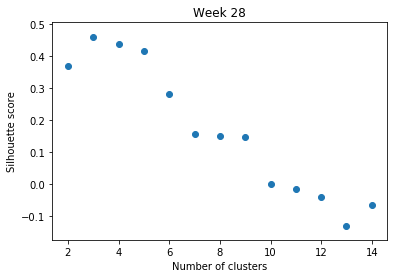

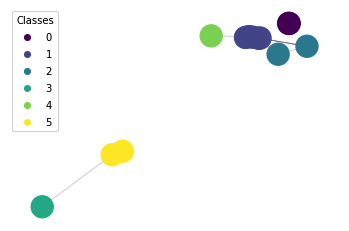

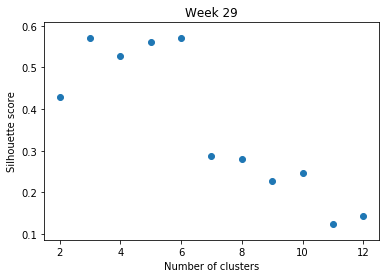

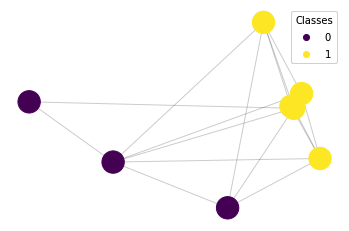

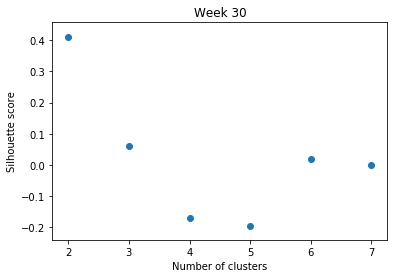

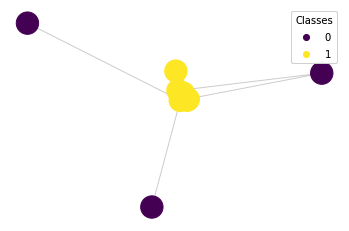

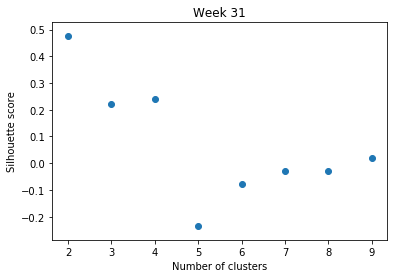

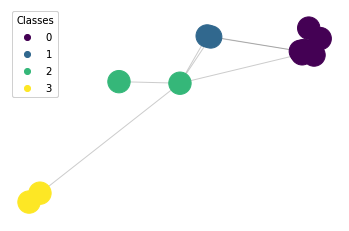

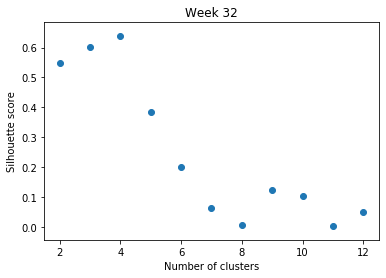

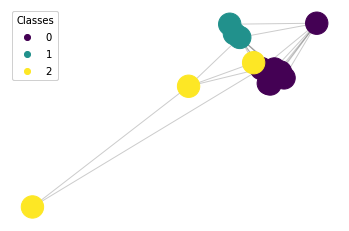

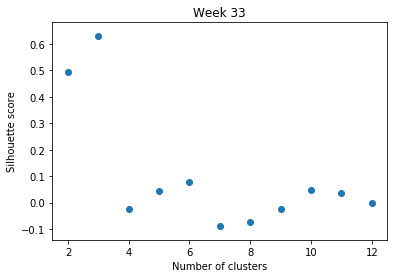

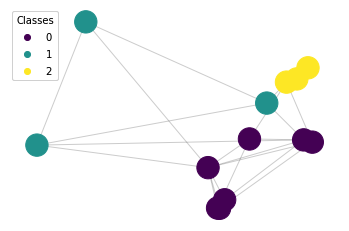

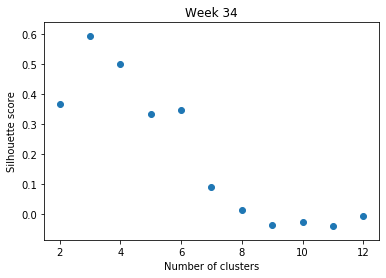

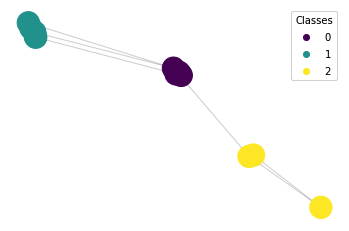

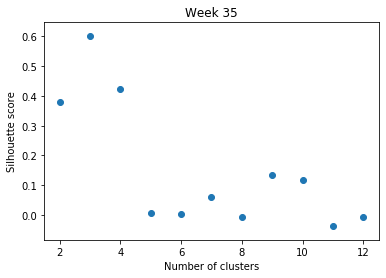

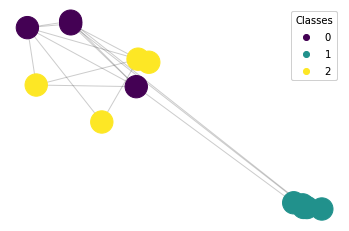

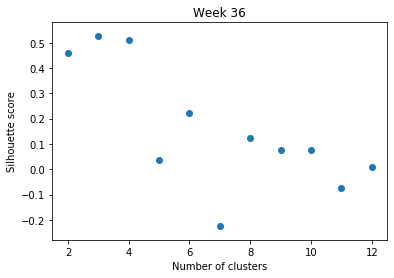

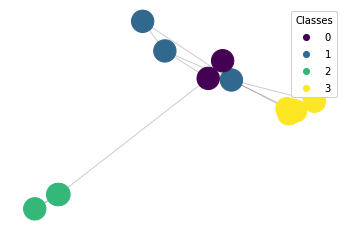

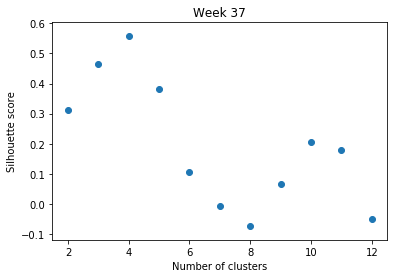

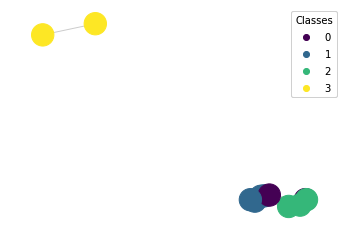

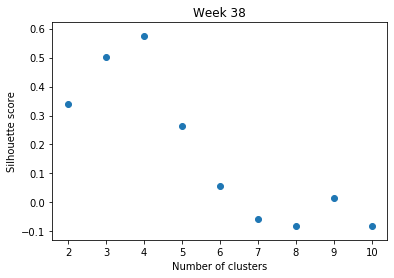

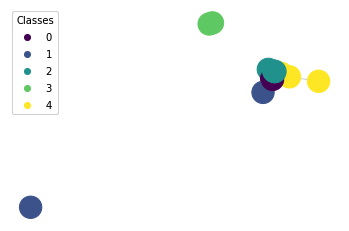

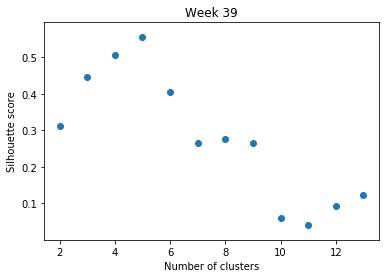

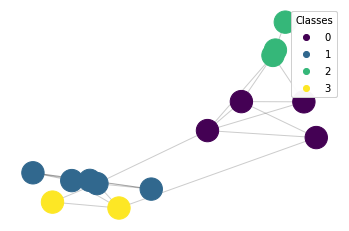

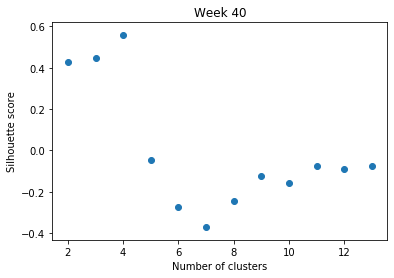

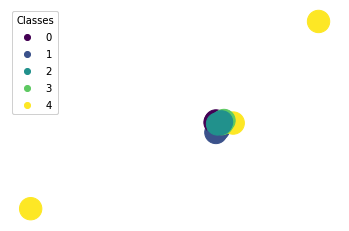

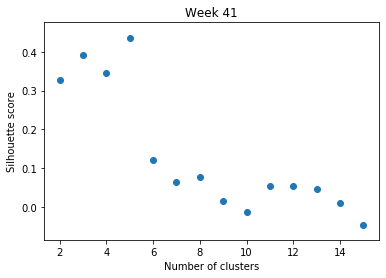

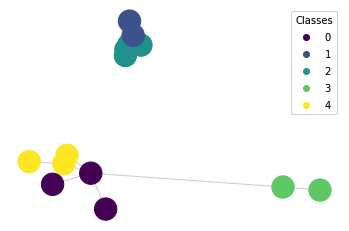

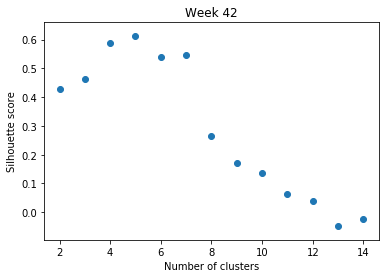

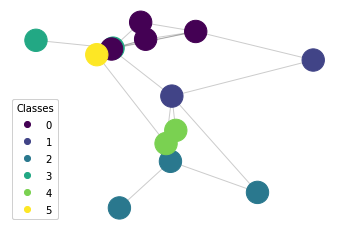

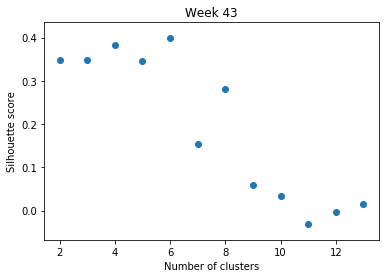

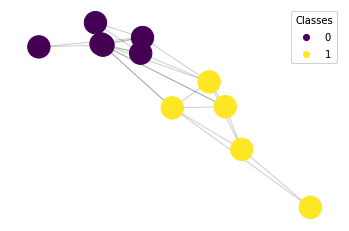

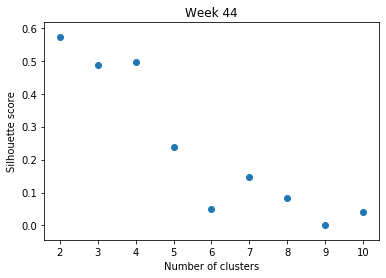

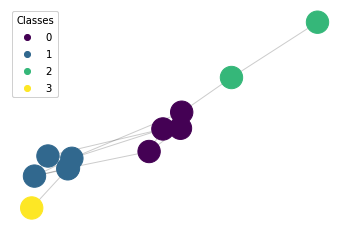

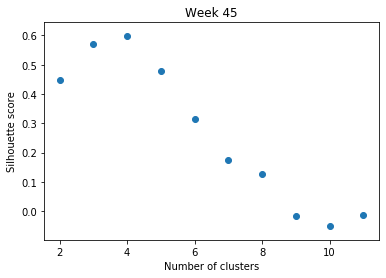

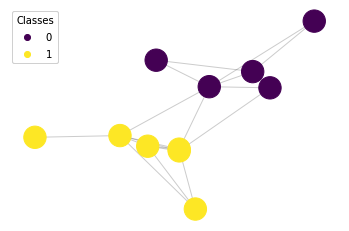

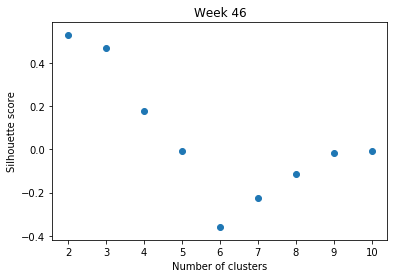

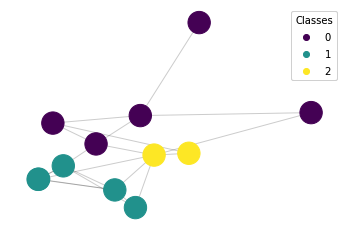

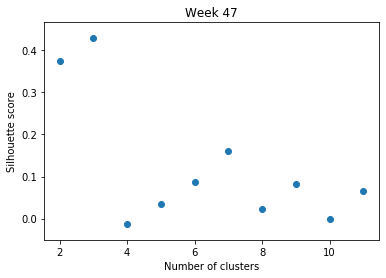

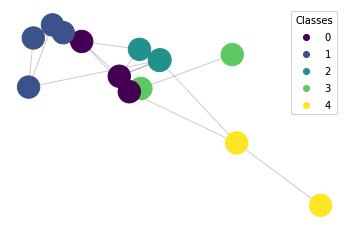

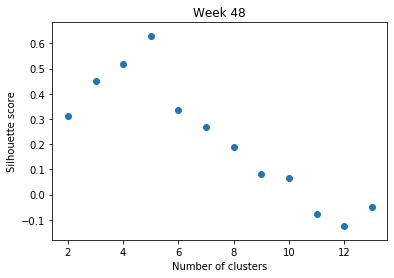

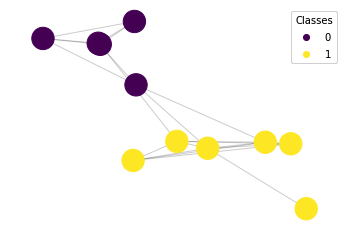

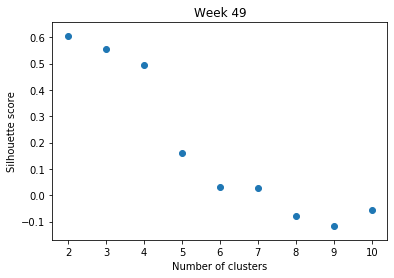

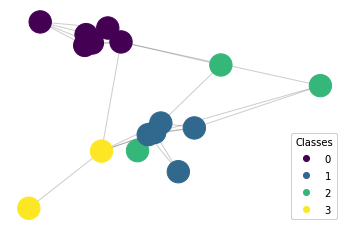

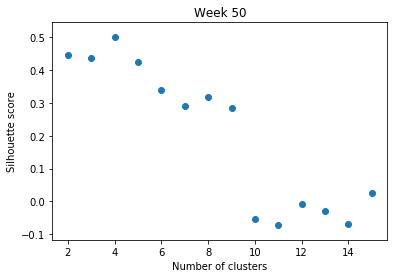

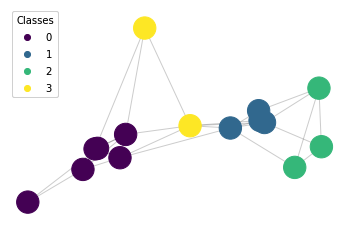

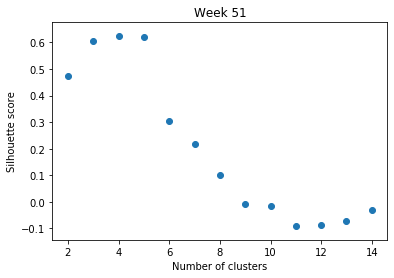

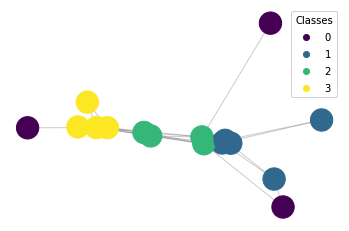

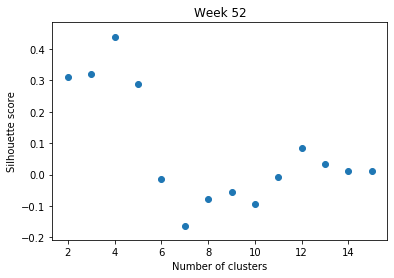

In [24]:
for f in files:
    g = nx.read_graphml(f[1])
    week_n = str(f[0])
    X = preprocess(g)
    clust_lab, max_score, scores, all_labels = cluster_score(X, g)
    
    # save clusters to file
    df = pd.DataFrame({'file': [week_n], 'best_clusters': [clust_lab],
                       'max_score': [max_score], 'scores': [scores],
                      'all_clusters': [all_labels]})
    df.to_csv('clusters.csv', index=False)
    
    plt.figure()
    plt.scatter(np.arange(2, len(scores)+2), scores)
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette score")
    plt.title("Week " + week_n)
    plt.show()